### SciPy
SciPy is a scientific computation library that uses NumPy underneath.SciPy stands for Scientific Python.
It provides more utility functions for optimization, stats and signal processing.
SciPy has optimized and added functions that are frequently used in NumPy and Data Science.

**Constants in SciPy**
SciPy provides many built-in scientific constants.These constants can be helpful when you are working with Data Science.

In [3]:
from scipy import constants

print("Value of pie: ",constants.pi)

#list of all units under the constants module
print(dir(constants))

Value of pie:  3.141592653589793
['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'g

Some constant units-

In [10]:
#Metric (SI) Prefixes: Return the specified unit in meter 
print(constants.kilo)  
print(constants.micro) 

#Binary Prefixes: Return the specified unit in bytes
print(constants.mebi)
print(constants.gibi) 

#Mass: Return the specified unit in kg 
print(constants.gram)        
print(constants.metric_ton)

#Angle: Return the specified unit in radians
print(constants.degree)   

#Time: Return the specified unit in seconds
print(constants.minute)     
print(constants.hour)      


1000.0
1e-06
1048576
1073741824
0.001
1000.0
0.017453292519943295
60.0
3600.0


### Optimizers in SciPy
Optimizers are a set of procedures defined in SciPy that either find the minimum value of a function, or the root of an equation.

optimze.root function helps to find the roots of both linear and non linear equations
Arguments - fun - a function representing an equation.  ,  x0 - an initial guess for the root.

The function returns an object with information regarding the solution.The actual solution is given under attribute x of the returned object.

In [17]:
from scipy.optimize import root
from math import cos

def eqn(x):
  return x + cos(x)
myroot = root(eqn, 0)
print(myroot.x)

[-0.73908513]


**Minimizing a Function**

A function, in this context, represents a curve, curves have high points(mazima) and low points(minima).
Finding Minima
We can use scipy.optimize.minimize() function to minimize the function.

In [19]:
from scipy.optimize import minimize
def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='CG')#CG - conjugate gradient method to minimize qauadratic equation
print(mymin.x)

[-0.5]


### Sparse Data
Sparse data is data that has mostly unused elements (elements that don't carry any information ).Most of the item values are zero.
scipy.sparse that provides functions to deal with sparse data.

Two types of sparse matrices that we use:
CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.
CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

In [28]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])
print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


In [35]:
a = np.array([[0, 5, 0], [0, 0, 7], [0, 0, 2]])

#Viewing stored data (not the zero items) with the data property
print("Data: ",csr_matrix(a).data)
#Counting nonzeros 
print("count: ",csr_matrix(a).count_nonzero())

#Removing zero-entries from the matrix 
matrix = csr_matrix(arr)
matrix.eliminate_zeros()
print("Matrix after Removing zero-entries: ",matrix)

#Eliminating duplicate entries by adding them
matrix = csr_matrix(arr)
matrix.sum_duplicates()
print("Matrix after eliminating duplicates: ",matrix)

#Converting from csr to csc 
new = csr_matrix(arr).tocsc()
print("CSC matrix: ",new)

Data:  [5 7 2]
count:  3
Matrix after Removing zero-entries:    (0, 5)	1
  (0, 6)	1
  (0, 8)	2
Matrix after eliminating duplicates:    (0, 5)	1
  (0, 6)	1
  (0, 8)	2
CSC matrix:    (0, 5)	1
  (0, 6)	1
  (0, 8)	2


### SciPy - Integrate 
Scipy has a number of routines for performing numerical integration in scipy.integrate library. 

scipy.integrate.quad(f, a, b) performs single integrals of a function f(x) over a given fixed range from a to b(lower and upper limits).


In [37]:
import scipy.integrate
from numpy import exp
func= lambda x:exp(-x**3)
i = scipy.integrate.quad(func, 0, 1)
print(i)  #The quad function returns the two values, in which the first number is the value of integral
#the second value is the estimate of the absolute error in the value of integral.

(0.8075111821396714, 8.965175070537417e-15)


For Double Integrate - scipy.integrate.dblquad(func, a, b, gfun, hfun) where, func is the name of the function to be integrated, ‘a’ and ‘b’ are the lower and upper limits of the x variable, respectively, while gfun and hfun are the names of the functions that define the lower and upper limits of the y variable

In [40]:
f = lambda x, y : 2*x*y
g = lambda x : 1
h = lambda y : 2*y
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(-0.0625, 2.1365437515743564e-15)


### SciPy - Interpolate
Interpolation is the process of finding a value between two points on a line or a curve.It can be done using the scipy.interpolate package.

The interp1d class in the scipy.interpolate is a convenient method to create a function based on fixed data points, which can be evaluated anywhere within the domain defined by the given data using linear interpolation.
These functions, for a given input x returns y. The third variable kind represents the type of the interpolation technique. 'Linear', 'Nearest', 'Zero', 'Slinear', 'Quadratic', 'Cubic' are a few techniques of interpolation.

[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ] [ 0.          0.0394959   0.15736782  0.34811123  0.59083932  0.83473663
  0.98898316  0.93412157  0.57548543 -0.05837414]


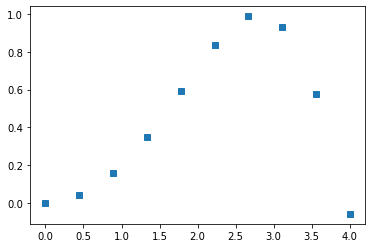

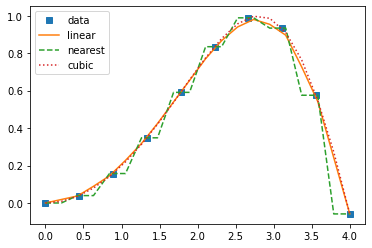

In [49]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 10)   #Return evenly spaced numbers over a specified interval
y = np.sin(x**2/5)
print(x,y)
plt.plot(x, y,'s')
plt.show()

f1 = interpolate.interp1d(x, y,kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'nearest')
f3 = interpolate.interp1d(x, y, kind = 'cubic')
x_new = np.linspace(0, 4,20)
plt.plot(x, y, 's', x_new, f1(x_new), '-', x_new, f2(x_new), '--', x_new, f3(x_new), ':')
plt.legend(['data', 'linear','nearest','cubic'], loc = 'best')
plt.show()

**Univariate Spline** 
One-dimensional smoothing spline fits a given set of data points. 
The UnivariateSpline class in scipy.interpolate is a convenient method to create a function, based on fixed data points class – scipy.interpolate.UnivariateSpline(x, y, w = None, bbox = [None, None], k = 3, s = None, ext = 0, check_finite = False).

(pins were placed at a judicious selection of points along a curve in a design, and then the spline was bent, so that it touched each of these pins.The points where the pins are located is called knots.)

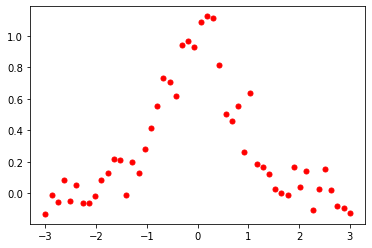

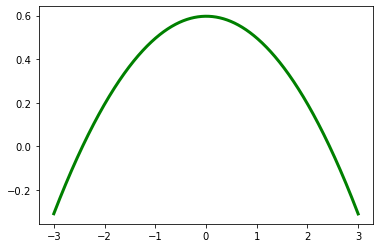

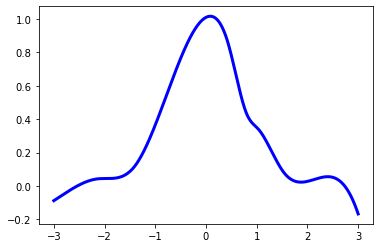

In [53]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)
plt.show()
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
plt.show()
spl.set_smoothing_factor(0.5) #Specifies the number of knots by specifying a smoothing condition.
plt.plot(xs, spl(xs), 'b', lw = 3)
plt.show()

### SciPy - Linalg
A scipy.linalg contains all the functions that are in numpy.linalg. Additionally, scipy.linalg also has some other advanced functions that are not in numpy.linalg.

**Linear Equations**
The scipy.linalg.solve feature solves the linear equation a * x + b * y = Z, for the unknown x, y values.

In [56]:
from scipy import linalg
a = np.array([[3, 7, -3], [1, -3, 1], [-3, 5, 1]])
b = np.array([3, 5, -1])

x = linalg.solve(a, b)
print("Solution of linear equations: ",x)


Solution of linear equations:  [3.3 0.9 4.4]


In [58]:
#finding determinant
a = np.array([[3, 7, -3], [1, -3, 1], [-3, 5, 1]])
x = linalg.det(a)
print("Determinant: ",x)

Determinant:  -40.0


In [59]:
#scipy.linalg.eig computes the eigenvalues from an ordinary or generalized eigenvalue problem. 
#This function returns the Eigen values and the Eigen vectors.
a = np.array([[3, 7, -3], [1, -3, 1], [-3, 5, 1]])
l, v = linalg.eig(a)
print("Eigen values: ",l)
print("Eigen vectors: ",v)

Eigen values:  [-5.61355905+0.j  5.25849328+0.j  1.35506576+0.j]
Eigen vectors:  [[ 0.60802842 -0.83582863  0.37689109]
 [-0.47581211 -0.03486671  0.28863601]
 [ 0.63553463  0.54788212  0.8801377 ]]
